In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from src.utils.utils import DATA_PATH, ROOT
from src.dataset import SVHNDataset
from ultralytics import YOLO
from src.onnx_model import YoloOnnxModel
import numpy as np
from src.transforms import resize_pad
import albumentations as A
import random
import cv2
import matplotlib.pyplot as plt


In [3]:
# model = YOLO("yolov8n.pt")
# model = YOLO(ROOT / "notebooks/runs/detect/train/weights/best.pt")

# model.train(data="../svhn.yaml", epochs=50, imgsz=256, device=0, batch=128)


In [4]:
root = str(DATA_PATH / "SVHN")
ds = SVHNDataset(root=root, split="test", download=False)


2023-06-06 10:42:30 - INFO - Creating test SVHN dataset parsed to YOLO format.
2023-06-06 10:42:30 - INFO - 13068 SVHN test images are already parsed to 13068 yolo labels
2023-06-06 10:42:30 - INFO - SVHN test dataset is already parsed to YOLO format. Stopping.


In [5]:
model = YOLO(ROOT / "notebooks/runs/detect/train/weights/best.pt")
# model.export(format="onnx", imgsz=256)

model_path = ROOT / "notebooks/runs/detect/train/weights/best.onnx"
onnx_model = YoloOnnxModel(model_path, 0.25, 0.7)


/home/shate/.cache/pypoetry/virtualenvs/multidigit-number-recognition-km_54aGG-py3.11/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


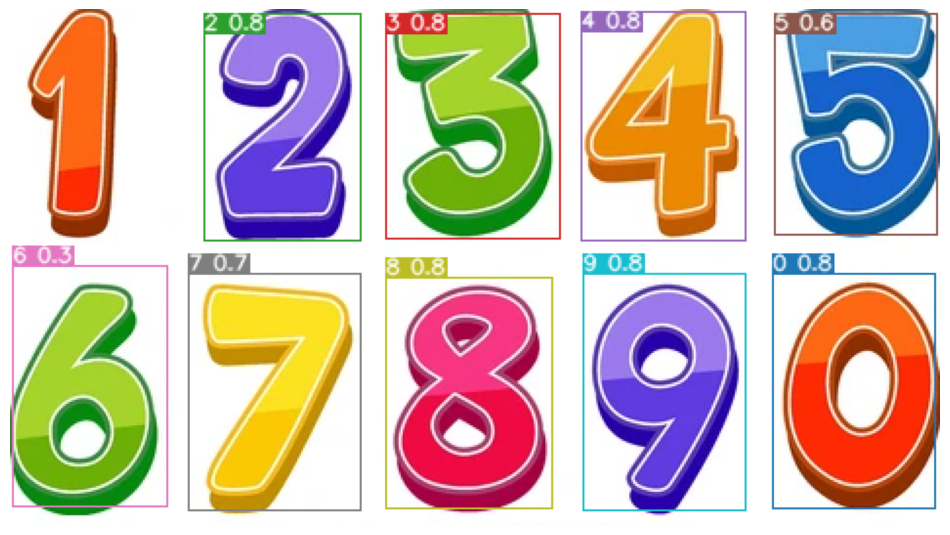

In [7]:
img = np.array(ds[111][0])
img = cv2.imread("nums_col.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img, _, _ = resize_pad(img)

x = np.asarray(img)[..., :3].astype(np.uint8)
out = onnx_model(x)

out.visualize()
